<a href="https://colab.research.google.com/github/ggoddll99/ds_study/blob/main/240902_%EA%B3%BC%EC%A0%9C_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 한글 폰트 사용

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,411 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123597 files and dire

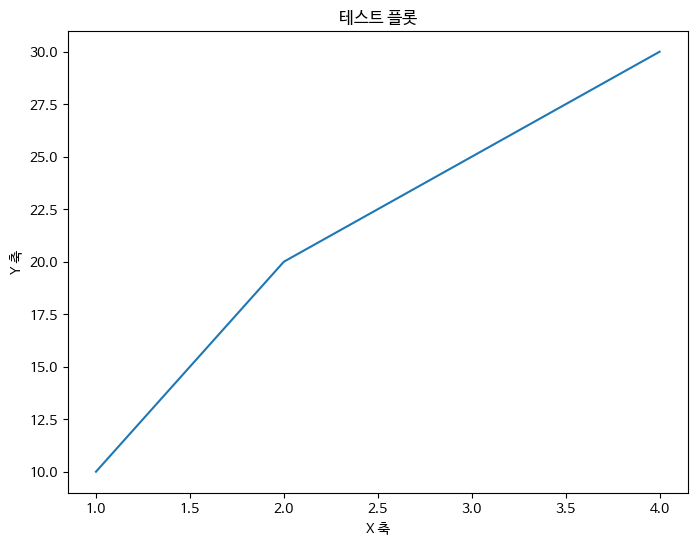

In [1]:
import matplotlib.pyplot as plt # 맷플롯립 import 하기
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기
plt.rcParams['axes.unicode_minus'] = False

# 플롯 예시
plt.figure(figsize=(8, 6))
plt.plot([1, 2, 3, 4], [10, 20, 25, 30])
plt.title('테스트 플롯')
plt.xlabel('X 축')
plt.ylabel('Y 축')
plt.show()

# **CHAPTER3. 분류**
## **3.1 MNIST**

In [66]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

사이킷런에서 읽어 들이는 데이터셋은 일반적으로 비슷한 딕셔너리 구조를 가지고 있다.
* 데이터셋을 설명하는 DESCR 키
* 샘플이 하나의 행, 특성이 하나의 열로 구성된 배열을 가진 data 키
* 레이블 배열을 담은 target 키

In [3]:
X, y=mnist['data'], mnist['target']
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

이미지가 70,000개 있고 각 이미지에는 784개의 특성이 있다. 이미지가 28x28 픽셀이기 때문이다. 개개의 특성은 단순히 0(흰색)부터 255(검은색)까지의 픽셀 강도를 나타낸다. 데이터셋에서 이미지 하나를 확인해보자. 샘플의 특성 벡터를 추출해서 28x28 배열로 크기를 바꾸고 맷플롯립의 `imshow()` 함수를 사용해 그리면 된다.

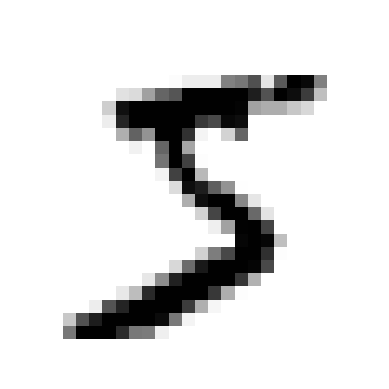

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit=X[0]
some_digit_image=some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

위 그림은 숫자 5로 보인다. 실제 레이블을 확인해보자.

In [6]:
y[0]

'5'

레이블은 문자열이다. 대부분 머신러닝 알고리즘은 숫자를 기대하므로 y를 정수로 변환한다.

In [7]:
import numpy as np

y=y.astype(np.uint8)

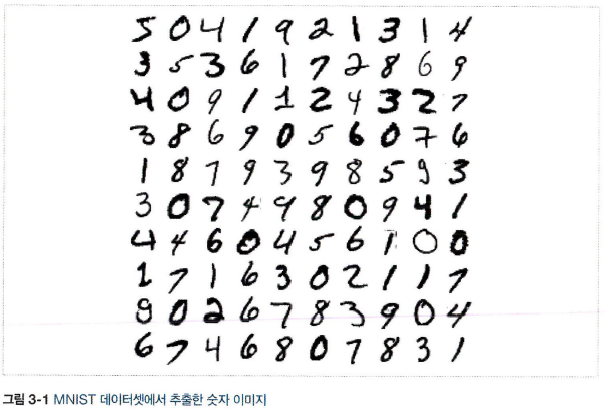

MNIST 데이터셋은 이미 훈련 세트(앞쪽 60,000개 이미지)와 테스트 세트(뒤쪽 10,000개 이미지)로 나누어져있다.

In [8]:
X_train, X_test, y_train, y_test=X[:60000], X[60000:], y[:60000], y[60000:]

훈련 세트는 이미 섞여 있어서 모든 교차 검증 폴드를 비슷하게 만든다(하나의 폴드라도 특정 숫자가 누락되면 안 된다.) 어떤 학습 알고리즘은 훈련 샘플의 순서에 민감해서 많은 비슷한 샘플이 연이어 나타나면 성능이 나빠진다. 데이터셋을 섞으면 이런 문제를 방지할 수 있다.

## **3.2 이진 분류기 훈련**

문제를 단순화해서 하나의 숫자, 숫자 5만 식별해보자. 이 '5-감지기'는 '5'와 '5 아님' 두 개의 클래스를 구분할 수 있는 이진 분류기(binary classifier)의 한 예이다. 분류 작업을 위해 타깃 벡터를 만들어보자.

In [9]:
y_train_5=(y_train==5) # 5는 True고, 다른 숫자는 모두 False
y_test_5=(y_test==5)

분류 모델을 하나 선택해서 훈련시켜보자. 사이킷런의 `SGDClassifier` 클래스를 사용해 확률적 경사 하강법(Stochastic Gradient Descent(SGD)) 분류기로 시작해보자. 이 분류기는 매우 큰 데이터셋을 효율적으로 처리하는 장점을 지니고 있다. SGD가 한 번에 하나씩 훈련 샘플을 독립적으로 처리하기 때문이다(그래서 SGD가 온라인 학습에 잘 들어맞는다).

SGD가 샘플을 섞어야 하는 대표적인 경우이다. 사이킷런의 `SGDClassifier`와 `SGDRegressor`는 기본적으로 에포크(`max_iter`)마다 훈련 데이터를 다시 섞는다.

In [10]:
from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

`SGDClassifier`는 훈련하는 데 무작위성을 사용한다(그래서 이름에 '확률적'이 붙어있다). 결과를 재현하고 싶다면 `random_state` 매개변수를 지정해야 한다.

이제 이 모델을 사용해 숫자 5의 이미지를 감지해보자.

In [11]:
sgd_clf.predict([some_digit])

array([ True])

분류기는 이 이미지가 5를 나타낸다고 추측했다(True). 이제 모델의 성능을 평가해보자.

## **3.3 성능 측정**
### **3.3.1 교차 검증을 사용한 정확도 측정**

가끔 사이킷런이 제공하는 기능보다 교차 검증 과정을 더 많이 제어해야 할 필요가 있다. 이때는 교차 검증 기능을 직접 구현하면 된다. 다음 코드는 사이킷런의 `cross_val_score()` 함수와 거의 같은 작업을 수행하고 동일한 결과를 출력한다.

In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds=StratifiedKFold(n_splits=3)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf=clone(sgd_clf)
    X_train_folds=X_train[train_index]
    y_train_folds=y_train_5[train_index]
    X_test_fold=X_train[test_index]
    y_test_fold=y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred=clone_clf.predict(X_test_fold)
    n_correct=sum(y_pred==y_test_fold)
    print(n_correct/len(y_pred)) # 0.9502, 0.96565, 0.96495 출력

0.95035
0.96035
0.9604


`StratifiedKFold`는 클래스별 비율이 유지되도록 폴드를 만들기 위해 계층적 샘플링을 수행한다. 매 반복에서 분류기 객체를 복제하여 훈련 폴드로 훈련시키고 테스트 폴드로 예측을 만든다. 그런 다음 올바른 예측의 수를 세어 정확한 예측의 비율을 출력한다.

`cross_val_score()` 함수로 폴드가 3개인 k-겹 교차 검증을 사용해 `SGDClassifier` 모델을 평가해보자. k-겹 교차 검증은 훈련 세트를 k개(여기서는 3개)의 폴드로 나누고, 각 폴드에 대해 예측을 만들고 평가하기 위해 나머지 폴드로 훈련시킨 모델을 사용한다.

In [13]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

모든 교차 검증 폴드에 대해 정확도(accuracy(정확한 예측의 비율))이 95% 이상이다.

모든 이미지를 '5 아님' 클래스로 분류하는 더미 분류기를 만들어 비교해보자.

In [14]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

모델의 정확도를 추측해보자.

In [15]:
never_5_clf=Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

정확도가 90% 이상으로 나왔다. 이미지의 10% 정도만 숫자 5이기 때문에 무조건 '5 아님'으로 예측하면 정확히 맞출 확률이 90%이다.

이 예제는 정확도를 분류기의 성능 측정 지표로 선호하지 않는 이유를 보여준다. 특히 불균형한 데이터셋을 다룰 때(즉, 어떤 클래스가 다른 것보다 월등히 많은 경우) 더욱 그렇다.

### **3.3.2 오차 행렬**

분류기의 성능을 평가하는 더 좋은 방법은 오차 행렬(confusion matrix)을 조사하는 것이다. 기본적인 아이디어는 클래스 A의 샘플이 클래스 B로 분류된 횟수를 세는 것이다. 예를 들어 분류기가 숫자 5의 이미지를 3으로 잘못 분류한 횟수를 알고 싶다면 오차 행렬의 5행 3열을 보면 된다.

오차 행렬을 만들려면 실제 타깃과 비교할 수 있도록 먼저 예측값을 만들어야 한다. 테스트 세트로 예측을 만들 수 있지만 여기서 사용하면 안된다(테스트 세트는 분류기가 출시 준비를 마치고 나서 프로젝트의 맨 마지막에 사용된다). 대신 `cross_val_predict()` 함수를 사용할 수 있다.

In [16]:
from sklearn.model_selection import cross_val_predict

y_train_pred=cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

`cross_val_score()` 함수처럼 `cross_val_predict()` 함수는 k-겹 교차 검증을 수행하지만 평가 점수를 반환하지 않고 각 테스트 폴드에서 얻은 예측을 반환한다. 즉, 훈련 세트의 모든 샘플에 대해 깨끗한 예측을 얻게 된다(여기서 깨끗하다는 뜻은 모델이 훈련하는 동안 보지 못했던 데이터에 대해 예측했다는 의미이다).


---


**cross_val_predict**

`cross_val_predict`는 교차 검증 방식으로 데이터셋을 나누고, 각 폴드를 테스트 세트로 사용해 예측값을 반환한다. 각 데이터 포인트에 대한 예측값은 해당 데이터를 학습에 사용하지 않은 모델에 의해 생성됩니다. 이는 마치 모델이 실제로 "처음 보는 데이터"에 대해 예측하는 것과 유사한 상황을 만들어, 테스트 데이터에 대한 예측과 비슷한 성격을 가진 결과를 제공합니다. 이를 통해 과적합을 방지하고, 모델의 일반화 성능을 보다 신뢰성 있게 평가할 수 있습니다.


---


이제 `confusion_matrix()` 함수를 사용해 오차 행렬을 만들 준비가 되었다. 타깃 클래스(`y_train_5`)와 예측 클래스(`y_train_pred`)를 넣고 호출하면 된다.

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

오차 행렬의 행은 실제 클래스를 나타내고 열은 예측한 클래스를 나타낸다. 이 행렬의 첫 번째 행은 '5 아님' 이미지(음성 클래스)에 대한 것으로, 53,057개를 '5 아님'으로 정확하게 분류했고(진짜 음성) 나머지 1,522개는 '5'라고 잘못 분류했다(거짓 양성). 두 번째 행은 '5' 이미지(양성 클래스)에 대한 것으로, 1,325개를 '5 아님'으로 잘못 분류했고(거짓 음성) 나머지 4,096개를 정확히 '5'라고 분류했다(진짜 양성). 완벽한 분류기라면 진짜 양성과 진짜 음성만 가지고 있을 것이므로 오차 행렬의 주대각선만 0이 아닌 값이 된다.

In [18]:
y_train_perfect_prediction=y_train_5 # 완벽한 분류기일 경우
confusion_matrix(y_train_5, y_train_perfect_prediction)

array([[54579,     0],
       [    0,  5421]])

오차 행렬이 많은 정보를 제공해주지만 가끔 더 요약된 지표가 필요할 때도 있다. 살펴볼만한 것 하나는 양성 예측의 정확도이다. 이를 분류기의 정밀도라고 한다(식 3-1).

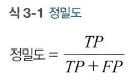

TP는 진짜 양성의 수이고, FP는 거짓 양성의 수이다. 확실한 양성 샘플 하나만 예측하면 간단히 완벽한 정밀도를 얻을 수 있지만(정밀도=1/1=100%), 이는 분류기가 다른 모든 양성 샘플을 무시하기 때문에 그리 유용하지 않다. 정밀도는 재현율이라는 또 다른 지표와 같이 사용하는 것이 일반적이다. 재현율은 분류기가 정확하게 감지한 양성 샘플의 비율로 (식 3-2), 민감도 또는 진짜 양성 비율(TPR)이라고도 한다.

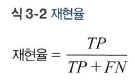

FN은 거짓 음성의 수이다. 오차 행렬이 조금 헷갈린다면 [그림 3-2]를 참고하자.

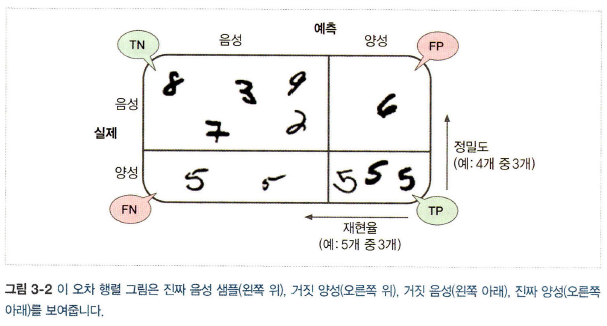

### **3.3.3 정밀도와 재현율**

사이킷런은 정밀도와 재현율을 포함하여 분류기의 지표를 계산하는 여러 함수를 제공한다.

In [19]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [20]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

5로 판별된 이미지 중 72.9%만 정확하다. 더군다나 전체 숫자 5에서 75.6%만 감지했다. 정밀도와 재현율을 F1 점수라고 하는 하나의 숫자로 만들면 편리할 때가 많다. 특히 두 분류기를 비교할 때 그렇다. F1 점수는 정밀도와 재현율의 조화 평균이다(식 3-3).

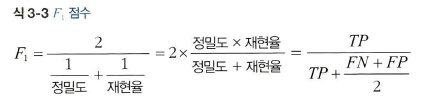

F1 점수를 계산하려면 `f1_score()` 함수를 호출하면 된다.

In [21]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

정밀도와 재현율이 비슷한 분류기에서는 F1 점수가 높다. 하지만 이게 항상 바람직한 것은 아니다. 상황에 따라 정밀도가 중요할 수도 있고 재현율이 중요할 수도 있다. 예를 들어 어린아이에게 안전한 동영상을 걸러내는 분류기를 훈련시킨다고 가정해보자. 재현율은 높으나 정말 나쁜 동영상이 몇 개 노출되는 것보다 좋은 동영상이 많이 제외되더라도(낮은 재현율) 안전한 것들만 노출시키는(높은 정밀도) 분류기를 선호할 것이다(이런 경우에는 분류기의 동영상 선택 결과를 확인하기 위해 사람이 참여하는 분석 파이프라인을 추가할지도 모른다). 다른 예로, 감시 카메라를 통해 좀도둑을 잡아내는 분류기를 훈련시킨다고 가정해보자. 분류기의 재현율이 99%라면 정확도가 30%만 되더라도 괜찮을지 모른다(아마도 경비원이 잘못된 호출을 종종 받게 되겠지만, 거의 모든 좀도둑을 잡을 것이다). 하지만 이 둘을 모두 얻을 수는 없다. 정밀도를 올리면 재현율이 줄고 그 반대도 마찬가지이다. 이를 정밀도/재현율 트레이드오프라고 한다.

### **3.3.4 정밀도/재현율 트레이드오프**

`SGDClassifier`가 분류를 어떻게 결정하는지 살펴보며 이 트레이드오프를 이해해보자. 이 분류기는 결정 함수(decision function)를 사용하여 각 샘플의 점수를 계산한다. 이 점수가 임곗값보다 크면 샘플을 양성 클래스에 할당하고 그렇지 않으면 음성 클래스에 할당한다. [그림 3-3]에 가장 낮은 점수부터 가장 높은 점수까지 몇 개의 숫자를 나열했다. 결정 임곗값(decision threshold)이 가운데(두 개의 숫자 5 사이) 화살표라고 가정해보자. 임곗값 오른쪽에 4개의 진짜 양성(실제 숫자 5)과 하나의 거짓 양성(실제 숫자 6)이 있다. 그렇기 때문에 이 임곗값에서 정밀도는 80%(5개 중 4개)이다. 하지만 실제 숫자 5는 6개고 분류기는 4개만 감지했으므로 재현율은 67%(6개 중 4개)이다. 이번에 임곗값을 높이면(임곗값을 오른쪽 화살표로 옮기면) 거짓 양성(숫자 6)이 진짜 음성이 되어 정밀도가 높아진다(이 경우에 100%가 된다). 하지만 진짜 양성 하나가 거짓 음성이 되었으므로 재현율이 50%로 줄어든다. 반대로 임곗값을 내리면 재현율이 높아지고 정밀도가 줄어든다.

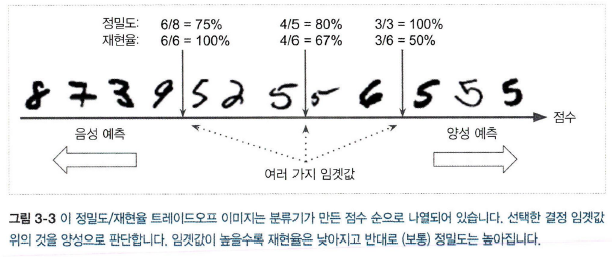

사이킷런에서 임곗값을 직접 지정할 수는 없지만 예측에 사용한 점수는 확인할 수 있다. 분류기의 predict() 메서드 대신 decision_function() 메서드를 호출하면 각 샘플의 점수를 얻을 수 있다. 이 점수를 기반으로 원하는 임곗값을 정해 예측을 만들 수 있다.

In [22]:
y_scores=sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [23]:
threshold=0
y_some_digit_pred=(y_scores>threshold)
y_some_digit_pred

array([ True])

`SGDClassifier`의 임곗값이 0이므로 위 코드는 predict() 메서드와 같은 결과(즉, True)를 반환한다. 임곗값을 높여보자.

In [24]:
threshold=8000
y_some_digit_pred=(y_scores>threshold)
y_some_digit_pred

array([False])

이 결과는 임곗값을 높이면 재현율이 줄어든다는 것을 보여준다. 이미지가 실제로 숫자 5이고 임곗값이 0일 때는 분류기가 이를 감지했지만, 임곗값을 8,000으로 높이면 이를 놓치게 된다. 그렇다면 적절한 임곗값을 어떻게 정할 수 있을까? 이를 위해서는 먼저 `cross_val_predict()` 함수를 사용해 훈련 세트에 있는 모든 샘플의 점수를 구해야 한다. 하지만 이번에는 예측 결과가 아니라 결정 점수를 반환받도록 지정해야 한다.

In [25]:
y_scores=cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                           method='decision_function')

이 점수로 `precision_recall_curve()` 함수를 사용하여 가능한 모든 임곗값에 대해 정밀도와 재현율을 계산할 수 있다.

`predict()` 메서드도 `decision_function()` 함수를 사용하여 0보다 큰 경우를 양성으로 예측한다.

In [26]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds=precision_recall_curve(y_train_5, y_scores)

맷플롯립을 이용해 임곗값의 함수로 정밀도와 재현율을 그릴 수 있다(그림 3-4).

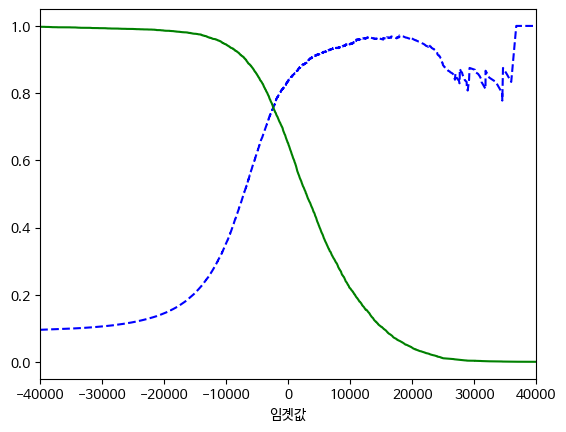

In [27]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='정밀도')
    plt.plot(thresholds, recalls[:-1], 'g-', label='재현율')
    plt.xlabel('임곗값')
    plt.xlim([-40000, 40000])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

정밀도 곡선이 재현율 곡선보다 울퉁불퉁하다. 이는 임곗값을 올리더라도 정밀도가 가끔 낮아질 때가 있기 때문이다(일반적으로는 높아져야 한다). 그래프에서 가운데 임곗값에서 오른쪽으로 숫자 하나만큼 이동하면 정밀도는 4/5(80%)에서 3/4(75%)로 줄어든다. 반면 재현율은 임곗값이 올라감에 따라 줄어들 수밖에 없어 부드러운 곡선이 된다.

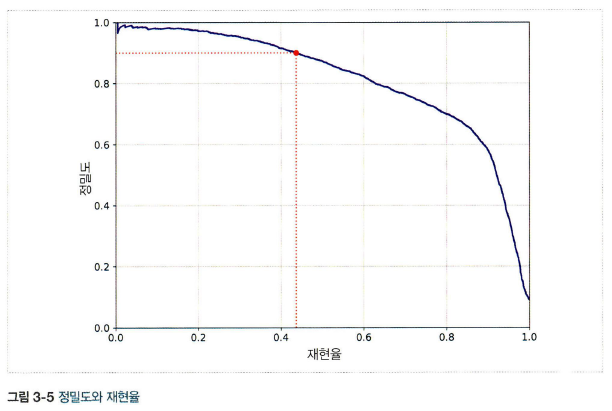

좋은 정밀도/재현율 트레이드오프를 선택하는 다른 방법은 [그림 3-5]처럼 재현율에 대한 정밀도 곡선을 그리는 것이다. 임곗값은 동일하다.

재현율 80% 근처에서 정밀도가 급격하게 줄어들기 시작한다. 이 하강점 직전을 정밀도/재현율 트레이드오프로 선택하는 것이 좋다. 예를 들면 재현율이 60% 정도인 지점이다.

정밀도 90%를 달성하는 것이 목표라고 가정해보자. 위에서 그린 그래프에서 임곗값이 약 8,000 정도라는 것을 알 수 있다. 조금 더 정확하게 최소한 90% 정밀도가 되는 가장 낮은 임곗값을 찾을 수 있다(`np.argmax()`는 최댓값의 첫 번째 인덱스를 반환한다. 여기에서는 첫 번째 True 값을 의미한다).

In [28]:
threshold_90_precision=thresholds[np.argmax(precisions>=0.90)] # ~7816
threshold_90_precision

3370.0194991439557

`average_precision_score()` 함수를 사용하면 정밀도/재현율 곡선의 아래 면적을 계산할 수 있어서 서로 다른 두 모델을 비교하는 데 도움이 된다.

(훈련 세트에 대한) 예측을 만들려면 분류기의 `predict()` 메서드를 호출하는 대신 다음 코드를 실행한다.

In [29]:
y_train_pred_90=(y_scores>=threshold_90_precision)
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [30]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

정밀도 90%를 달성한 분류기를 만들었다. 여기서 볼 수 있듯이 어떤 가상의 정밀도에 대해서도 분류기를 손쉽게 만들 수 있다. 충분히 큰 임곗값을 지정하면 끝이다. 재현율이 너무 낮으면 높은 정밀도의 분류기는 전혀 유용하지 않다.

### **3.3.5 ROC 곡선**

수신기 조작 특성(ROC) 곡선도 이진 분류에서 널리 사용하는 도구이다. 정밀도/재현율 곡선과 매우 비슷하지만, ROC 곡선은 정밀도에 대한 재현율 곡선이 아니고 거짓 양성 비율(FPR)에 대한 진짜 양성 비율(TPR, 재현율)의 곡선이다. 양성으로 잘못 분류된 음성 샘플의 비율이 FPR이다. 이는 1에서 음성으로 정확하게 분류한 음성 샘플의 비율인 진짜 음성 비율(TNR)을 뺀 값이다. TNR을 특이도라고도 한다. 그러므로 ROC 곡선은 민감도(재현율)에 대한 1-특이도 그래프이다.

ROC 곡선을 그리려면 먼저 `roc_curve()` 함수를 사용해 여러 임곗값에서 TPR과 FPR을 계산해야 한다.

In [31]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds=roc_curve(y_train_5, y_scores)

그러면 맷플롯립을 사용해 TPR에 대한 FPR 곡선을 나타낼 수 있다.

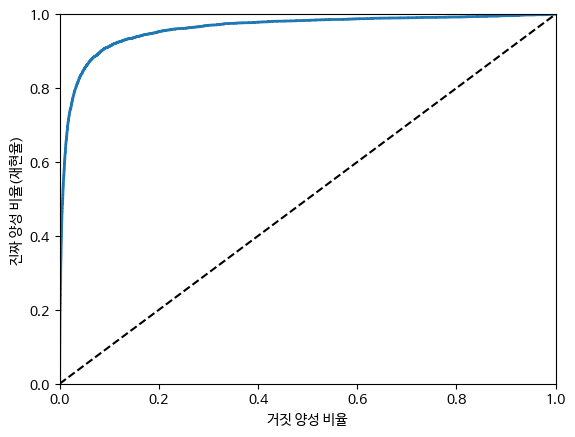

In [32]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # 대각 점선
    plt.axis([0, 1, 0, 1])
    plt.xlabel('거짓 양성 비율')
    plt.ylabel('진짜 양성 비율(재현율)')

plot_roc_curve(fpr, tpr)
plt.show()

여기에서도 트레이드 오프가 있다. 재현율(TPR)이 높을수록 분류기가 만드는 거짓 양성(FPR)이 늘어난다. 점선은 완전한 랜덤 분류기의 ROC 곡선을 뜻한다. 좋은 분류기는 이 점선에서 최대한 멀리 떨어져 있어야 한다(왼쪽 위 모서리).

곡선 아래의 면적(AUC)을 측정하면 분류기들을 비교할 수 있다. 완벽한 분류기는 ROC의 AUC가 1이고, 완전한 랜덤 분류기는 0.5이다. 사이킷런은 ROC의 AUC를 계산하는 함수를 제공한다.

In [33]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

ROC 곡선이 정밀도/재현율(PR) 곡선과 비슷해서 어떤 것을 사용해야 할지 궁금할 수 있다. 일반적인 법칙은 양성 클래스가 드물거나 거짓 음성보다 거짓 양성이 더 중요할 때 PR 곡선을 사용하고 그렇지 않으면 ROC 곡선을 사용한다. 예를 들어 조금 전의 ROC 곡선(그리고 ROC의 AUC 점수)을 보면 매우 좋은 분류기라고 생각할 수 있다. 하지만 이는 음성(5 아님)에 비해 양성(5)이 크게 적기 때문이다. 이와는 다르게 PR 곡선은 분류기의 성능 개선 여지가 얼마나 되는지(오른쪽 위 모서리에 가까워질 수 있는지) 잘 보여준다.

`RandomForestClassifier`를 훈련시켜 `SGDClassifier`의 ROC 곡선과 ROC AUC 점수를 비교해보자. 먼저 훈련 세트의 샘플에 대한 점수를 얻어야 한다. 하지만 작동 방식의 차이 때문에 `RandomForestClassifier`에는 `decision_function()` 메서드가 없다. 대신 `predict_proba()` 메서드가 있다. 사이킷런 분류기는 일반적으로 이 두 메서드 중 하나 또는 둘 모두를 가지고 있다. `predict_proba()` 메서드는 샘플이 행, 클래스가 열이고 샘플이 주어진 클래스에 속할 확률을 담은 배열을 반환한다.

In [34]:
from sklearn.ensemble import RandomForestClassifier

forest_clf=RandomForestClassifier(random_state=42)
y_probas_forest=cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                  method='predict_proba')

랜덤 분류기는 훈련 데이터의 클래스 비율을 따라 무작위로 예측하는 것을 말한다. 이렇게 되면 오차 행렬의 실제 클래스가 비슷한 비율의 예측 클래스로 나뉘어 FPR과 TPR 값이 비슷해진다. 결국 ROC 곡선이 $y=x$에 가깝게 되어 AUC 면적이 0.5가 된다. 사이킷런의 DummyClassifier에서 랜덤 분류기를 제공한다.

`roc_curve()` 함수는 레이블과 점수를 기대한다. 하지만 점수 대신에 클래스 확률을 전달할 수 있다. 양성 클래스 확률을 점수로 사용하면 다음과 같다.

In [35]:
y_scores_forest=y_probas_forest[:, 1] # 양성 클래스에 대한 확률을 점수로 사용한다.
fpr_forest, tpr_forest, thresholds_forest=roc_curve(y_train_5, y_scores_forest)

ROC 곡선과 첫 번째 ROC 곡선을 함께 그리면 다음과 같다.

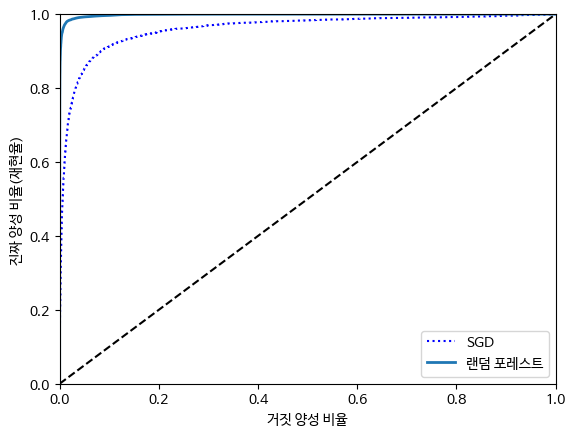

In [36]:
plt.plot(fpr, tpr, 'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, '랜덤 포레스트')
plt.legend(loc='lower right')
plt.show()

`RandomForestClassifier`의 ROC 곡선이 왼쪽 위 모서리에 더 가까워 `SGDClassifier`보다 훨씬 좋아보인다. ROC AUC 점수도 훨씬 높다.

In [37]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

정밀도와 재현율 점수를 계산하면 99.0% 정밀도와 86.6% 재현율이 나온다.

이제 이진 분류기를 훈련시키는 방법과 작업에 맞는 적절한 지표 선택, 교차 검증을 사용한 평가, 요구 사항에 맞는 정밀도/재현율 트레이드오프 선택, ROC 곡선과 ROC AUC 점수를 사용한 여러 모델의 비교에 대해 알게 되었을 것이다. 다음에는 숫자 5 이상을 감지해보겠다.

## **3.4 다중 분류**

이진 분류가 두 개의 클래스를 구별하는 반면 다중 분류기(또는 다항 분류기)는 둘 이상의 클래스를 구별할 수 있다.

SGD 분류기, 랜덤 포레스트 분류기, 나이브 베이즈 분류기 같은 알고리즘은 여러 개의 클래스를 직접 처리할 수 있는 반면, 로지스틱 회귀나 서포트 벡터 머신 분류기 같은 알고리즘은 이진 분류만 가능하다. 하지만 이진 분류기를 여러 개 사용해 다중 클래스를 분류하는 기법도 많다.

예를 들어 특정 숫자 하나만 구분하는 숫자별 이진 분류기 10개(0에서부터 9까지)를 훈련시켜 클래스가 10개인 숫자 이미지 분류 시스템을 만들 수 있다. 이미지를 분류할 때 각 분류기의 결정 점수 중에서 가장 높은 것을 클래스로 선택하면 된다. 이를 OvR(one-versus-the-rest) 전략이라고 한다(또는 OvA(one-versus-all라고도 부른다).

또 다른 전략은 0과 1 구별, 0과 2 구별, 1과 2 구별 등과 같이 각 숫자의 조합마다 이진 분류기를 훈련시키는 것이다. 이를 OvO(one-versus-one) 전략이라고 한다. 클래스가 N개라면 분류기는 Nx(N-1)/2개가 필요하다. MNIST 문제에서는 45개의 분류기를 훈련시켜야 한다. 이미지 하나를 분류하려면 45개 분류기 모두를 통과시켜서 가장 많이 양성으로 분류된 클래스를 선택한다. OvO 전략의 주요 장점은 각 분류기의 훈련에 전체 훈련 세트 중 구별할 두 클래스에 해당하는 샘플만 필요하다는 것이다.

서포트 벡터 머신 같은 일부 알고리즘은 훈련 세트의 크기에 민감해서 큰 훈련 세트에서 몇 개의 분류기를 훈련시키는 것보다 작은 훈련 세트에서 많은 분류기를 훈련시키는 쪽이 빠르므로 OvO를 선호한다. 하지만 대부분의 이진 분류 알고리즘에서는 OvR을 선호한다.

다중 클래스 분류 작업에 이진 분류 알고리즘을 선택하면 사이킷런이 알고리즘에 따라 자동으로 OvR 또는 OvO를 실행한다. `sklearn.svm.SVC` 클래스를 사용해 서포트 벡터 머신 분류기를 테스트해보자.

In [38]:
from sklearn.svm import SVC
svm_clf=SVC()
svm_clf.fit(X_train, y_train) # y_train_5가 아니라 y_train을 사용한다.
svm_clf.predict([some_digit])

array([5], dtype=uint8)

이 코드는 5를 구별한 타깃 클래스(`y_train_5`) 대신 0에서 9까지의 원래 타깃 클래스(`y_train`)를 사용해 SVC를 훈련시킨다. 그런 다음 예측 하나를 만든다. 내부에서는 사이킷런이 OvO 전략을 사용해 10개의 이진 분류기를 훈련시키고 각각의 결정 점수를 얻어 점수가 가장 높은 클래스를 선택한다.

정말 그런지 확인해보기 위해 `decision_function()` 메서드를 호출하면 (1개가 아니라) 샘플 당 10개의 점수를 반환한다. 이 점수는 클래스마다 하나씩이다.

In [39]:
some_digit_scores=svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

가장 높은 점수가 클래스 5에 해당하는 값이다.

In [40]:
np.argmax(some_digit_scores)

5

In [41]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [42]:
svm_clf.classes_[5]

5

분류기가 훈련될 때 `classes_` 속성에 타깃 클래스의 리스트를 값으로 정렬하여 저장한다. 위 예제에서는 `classes_` 배열에 있는 각 클래스의 인덱스가 클래스 값 자체와 같다(즉, 인덱스 5에 해당하는 클래스의 값은 5이다). 하지만 일반적으로 이런 경우는 드물다.

사이킷런에서 OvO나 OvR을 사용하도록 강제하려면 `OneVsOneClassifier`나 `OneVsRestClassifier`를 사용한다. 간단하게 이진 분류기 인스턴스를 만들어 객체를 생성할 때 전달하면 된다(심지어 이진 분류기일 필요도 없다). 예를 들어 다음 코드는 SVC 기반으로 OvR 전략을 사용하는 다중 분류기를 만든다.

In [43]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf=OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [44]:
len(ovr_clf.estimators_)

10

`SGDClassifier`(또는 `RandomForestClassifier`)를 훈련시키는 것도 간단하다.

In [45]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

이 경우 SGD 분류기는 직접 샘플을 다중 클래스로 분류할 수 있기 때문에 별도로 사이킷런의 OvR이나 OvO를 적용할 필요가 없다. `decision_function()` 메서드는 클래스마다 하나의 값을 반환한다. SGD 분류기가 클래스마다 부여한 점수를 확인해보자.

In [46]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

이 결과에서 분류기가 예측 결과에 강한 확신을 보이고 있음을 알 수 있다. 대부분의 점수가 큰 음수이다. 반면 클래스 5의 점수는 2412.5이다. 이 모델은 573.5의 점수를 얻은 클래스 3을 조금 의심하고 있다. 이제 물론 분류기를 평가해보고 싶을 것이다. 분류기 평가에는 일반적으로 교차 검증을 사용한다. `cross_val_score()` 함수를 사용해 `SGDClassifier`의 정확도를 평가해보자.

In [47]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

모든 테스트 폴드에서 84% 이상을 얻었다. 랜덤 분류기를 사용했다면 10% 정확도를 얻었을 것이므로 이 점수가 아주 나쁘지는 않지만 성능을 더 높일 여지가 있다. 예를 들어 간단하게 입력의 스케일을 조정하면 정확도를 89% 이상으로 높일 수 있다.

In [49]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.8983, 0.891 , 0.9018])

## **3.5 에러 분석**

실제 프로젝트라면 머신러닝 프로젝트 체크리스트(부록 B)의 단계를 따를 것이다. 데이터 준비 단계에서 가능한 선택 사항을 탐색하고, 여러 모델을 시도하고, 가장 좋은 몇 개를 골라 `GridSearchCV`를 사용해 하이퍼파라미터를 세밀하게 튜닝하고, 앞 장에서 한 것처럼 가능한 한 자동화한다. 이 절에서는 가능성이 높은 모델을 하나 찾았다고 가정하고 이 모델의 성능을 향상시킬 방법을 찾아볼 것이다. 한 가지 방법은 만들어진 에러의 종류를 분석하는 것이다.

먼저 오차 행렬을 살펴볼 수 있다. `cross_val_predict()` 함수를 사용해 예측을 만들고 이전처럼 `confusion_matrix()` 함수를 호출한다.

In [50]:
y_train_pred=cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx=confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

많은 숫자가 출력된다. 오차 행렬을 맷플롯립의 `matshow()` 함수를 사용해 이미지로 표현하면 보기에 편리하다.

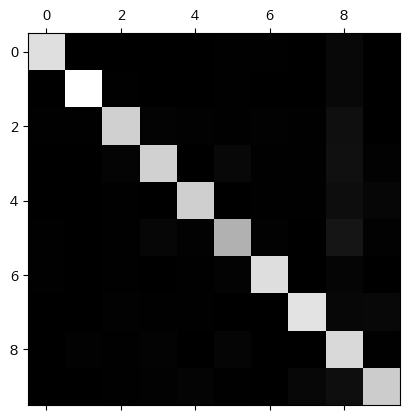

In [51]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

이 오차 행렬은 대부분의 이미지가 올바르게 분류되었음을 나타내는 주대각선에 있으므로 매우 좋아 보인다. 숫자 5는 다른 숫자보다 조금 더 어두워 보인다. 이는 데이터셋에 숫자 5의 이미지가 적거나 분류기가 숫자 5를 다른 숫자만큼 잘 분류하지 못한다는 뜻이다. 사실 두 경우에 대해 모두 확인해봐야 한다.

그래프의 에러 부분에 초점을 맞춰보자. 먼저 오차 행렬의 각 값을 대응되는 클래스의 이미지 개수로 나누어 (에러의 절대 개수가 아니라) 에러 비율을 비교한다(개수로 비교하면 이미지가 많은 클래스가 상대적으로 나쁘게 보인다).

In [52]:
row_sums=conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx=conf_mx/row_sums

다른 항목은 그대로 유지하고 주대각선만 0으로 채워서 그래프를 그린다.

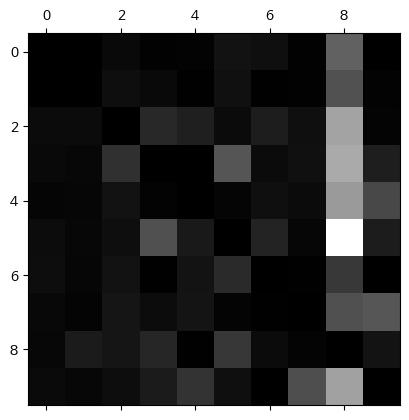

In [53]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

여기서 분류기가 만든 에러를 확실히 볼 수 있다. 행은 실제 클래스를 나타내고 열은 예측한 클래스를 나타낸다는 사실을 기억하자. 클래스 8의 열이 상당히 밝으므로 많은 이미지가 8로 잘못 분류되었음을 암시한다. 하지만 클래스 8의 행은 그리 나쁘지 않다. 이는 실제 8이 적절히 8로 분류되었다는 것을 말한다. 여기서 볼 수 있듯이 오차 행렬은 반드시 대칭인 것은 아니다. 3과 5가 (서로) 많이 혼동되고 있는 것도 볼 수 있다.

오차 행렬을 분석하면 분류기의 성능 향상 방안에 대한 통찰을 얻을 수 있다. 이 그래프를 살펴보면 8로 잘못 분류되는 것을 줄이도록 개선할 필요가 있다. 예를 들어 8처럼 보이지만 실제 8은 아닌 숫자의 훈련 데이터를 더 많이 모아서 실제 8과 구분하도록 분류기를 학습시킬 수 있다. 또는 분류기에 도움될만한 특성을 더 찾아볼 수 있다. 예를 들어 동심원의 수를 세는 알고리즘 같은 것이다(즉, 8은 2개, 6은 1개, 5는 0개이다). 또는 동심원 같은 어떤 패턴이 드러나도록 Scikit-Image, Pillow, OpenCV 등을 사용해서 이미지를 전처리해볼 수 있다.

개개의 에러를 분석해보면 분류기가 무슨 일을 하고, 왜 잘못되었는지에 대해 통찰을 얻을 수 있지만, 더 어렵고 시간이 오래 걸린다. 예를 들어 3과 5의 샘플을 그려보자(`plot_digits()`는 단순히 맷플롯립의 `imshow()` 함수를 사용하는 함수이다).

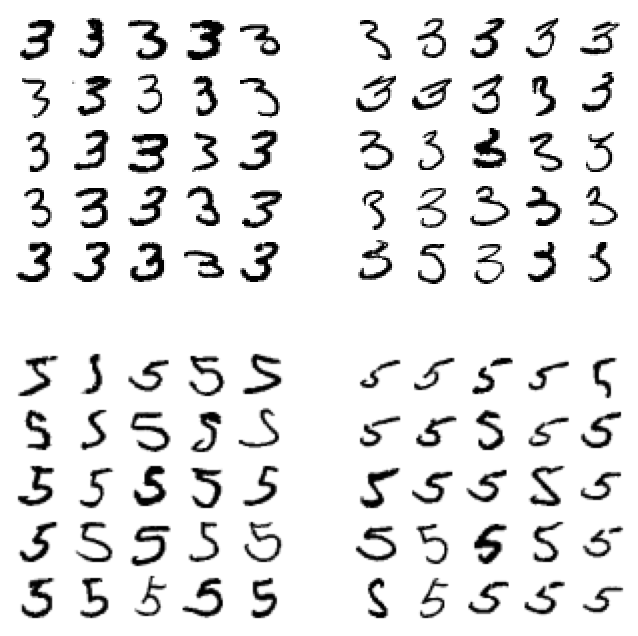

In [58]:
cl_a, cl_b=3, 5
X_aa=X_train[(y_train==cl_a)&(y_train_pred==cl_a)]
X_ab=X_train[(y_train==cl_a)&(y_train_pred==cl_b)]
X_ba=X_train[(y_train==cl_b)&(y_train_pred==cl_a)]
X_bb=X_train[(y_train==cl_b)&(y_train_pred==cl_b)]

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(8, 8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

왼쪽의 5x5 블록 두 개는 3으로 분류된 이미지이고 오른쪽 5x5 블록 두 개는 5로 분류된 이미지이다. 분류기가 잘못 분류한 숫자 중 일부는 정말 잘못 쓰여 있어서 (왼쪽 아래 블록과 오른쪽 위 블록) 사람도 분류하기 어렵다. 그러나 대부분의 잘못 분류된 이미지는 확실히 에러인 것 같고 분류기가 실수한 이유를 이해하기 어렵다. 원인은 선형 모델인 `SGDClassifier`를 사용했기 때문이다. 선형 분류기는 클래스마다 픽셀에 가중치를 할당하고 새로운 이미지에 대해 단순히 픽셀 강도의 가중치 합을 클래스의 점수로 계산한다. 따라서 3과 5는 몇 개의 픽셀만 다르기 때문에 모델이 쉽게 혼동하게 된다.

3과 5의 주요 차이는 위쪽 선과 아래쪽 호를 이어주는 작은 직선의 위치이다. 숫자 3을 쓸 때 연결 부위가 조금 왼쪽으로 치우치면 분류기가 5로 분류하고, 또 반대도 마찬가지이다. 다른 말로 하면 분류기는 이미지의 위치나 회전 방향에 매우 민감하다. 3과 5의 에러를 줄이는 한 가지 방법은 이미지를 중앙에 위치시키고 회전되어 있지 않도록 전처리하는 것이다. 이렇게 하면 다른 에러도 줄어들 것이다.

## **3.6 다중 레이블 분류**

지금까지는 각 샘플이 하나의 클래스에만 할당되었다. 하지만 분류기가 샘플마다 여러 개의 클래스를 출력해야 할 때도 있다. 얼굴 인식 분류기를 한 번 생각해보자. 같은 사진에 여러 사람이 등장한다면 인식된 사람마다 하나씩 꼬리표(tag)를 붙여야 한다. 분류기가 앨리스, 밥, 찰리 세 얼굴을 인식하도록 훈련되었다고 가정해보자. 분류기가 앨리스와 찰리가 있는 사진을 본다면 [1, 0, 1]을 출력해야 할 것이다(즉, '앨리스 있음, 밥 없음, 찰리 있음'). 이처럼 여러 개의 이진 꼬리표를 출력하는 분류 시스템을 다중 레이블 분류(multilabel classification) 시스템이라고 한다.

여기서는 얼굴 인식 시스템을 만들려는 것이 아니므로 학습을 위해 조금 더 간단한 예를 살펴보자.

In [59]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large=(y_train>=7)
y_train_odd=(y_train%2==1)
y_multilabel=np.c_[y_train_large, y_train_odd]

knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

이 코드는 각 숫자 이미지에 두 개의 타깃 레이블이 담긴 `y_multilabel` 배열을 만든다. 첫 번째는 숫자가 큰 값(7, 8, 9)인지 나타내고 두 번째는 홀수인지 나타낸다. 그 다음 줄이 `KNeighborsClassifier` 인스턴스를 만들고 다중 타깃 배열을 사용하여 훈련시킨다(`KNeighborsClassifier`는 다중 레이블 분류를 지원하지만 모든 분류기가 그런 것은 아니다). 이제 예측을 만들면 레이블이 두 개 출력된다.

In [60]:
knn_clf.predict([some_digit])

array([[False,  True]])

올바르게 분류되었다. 숫자 5는 크지 않고(False) 홀수(True)이다.

다중 레이블 분류기를 평가하는 방법은 많다. 적절한 지표는 프로젝트에 따라 다르다. 예를 들어 각 레이블의 F1 점수를 구하고 또는 앞서 언급한 이진 분류 지표를 사용하여 간단하게 평균 점수를 계산한다. 다음 코드는 모든 레이블에 대한 F1 점수의 평균을 계산한다.

In [61]:
y_train_knn_pred=cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average='macro')

0.976410265560605

실제로는 아닐 수 있지만 이 코드는 모든 레이블의 가중치가 같다고 가정한 것이다. 특히 앨리스 사진이 밥이나 찰리 사진보다 훨씬 많다면 앨리스 사진에 대한 분류기의 점수에 더 높은 가중치를 둘 것이다. 간단한 방법은 레이블에 클래스의 지지도(support)(즉, 타깃 레이블에 속한 샘플 수)를 가중치로 주는 것이다. 이렇게 하려면 이전 코드에서 `average='weighted'`로 설정하면 된다.

## **3.7 다중 출력 분류**

마지막으로 알아볼 분류 작업은 다중 출력 다중 클래스 분류(multioutput-multiclass classification)(또는 간단히 다중 출력 분류(multioutput classification)이다. 다중 레이블 분류에서 한 레이블이 다중 클래스가 될 수 있도록 일반화한 것이다(즉, 값을 두 개 이상 가질 수 있다).

이를 위해 이미지에서 잡음을 제거하는 시스템을 만들어보자. 잡음이 많은 숫자 이미지를 입력으로 받고 깨끗한 숫자 이미지를 MNIST 이미지처럼 픽셀의 강도를 담은 배열로 출력한다. 분류기의 출력이 다중 레이블(픽셀당 한 레이블)이고 각 레이블은 값을 여러 개 가진다(0부터 255까지 픽셀 강도). 그러므로 이 예는 다중 출력 분류 시스템이다.

이 예에서처럼 분류와 회귀 사이의 경계는 때때로 모호하다. 확실히 픽셀 강도 예측은 분류보다 회귀와 비슷하다. 더욱이 다중 출력 시스템이 분류 작업에 국한되지도 않는다. 그래서 샘플마다 클래스와 값을 모두 포함하는 다중 레이블이 출력되는 시스템도 가능하다.

`average='micro'` 옵션은 모든 클래스의 FP, FN, TP 총합을 이용해 F1 점수를 계산한다. `accuracy_score, precision_socre, recall_score, classification_report` 함수 등이 다중 분류를 지원한다.

먼저 MNIST 이미지에서 추출한 훈련 세트와 테스트 세트에 넘파이의 `randint()` 함수를 사용하여 픽셀 강도에 잡음을 추가한다. 타깃 이미지는 원본 이미지이다.

In [62]:
noise=np.random.randint(0, 100, (len(X_train), 784))
X_train_mod=X_train+noise
noise=np.random.randint(0, 100, (len(X_test), 784))
X_test_mod=X_test+noise
y_train_mod=X_train
y_test_mod=X_test

테스트 세트에서 이미지를 하나 선택하자. 왼쪽이 잡음이 섞인 입력 이미지이고 오른쪽이 깨끗한 타깃 이미지이다. 분류기를 훈련시켜 이 이미지를 깨끗하게 만들어보겠다.

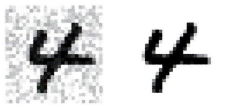

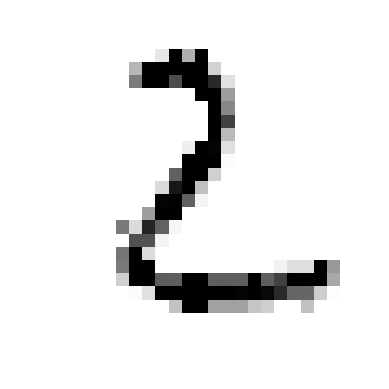

In [65]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit=knn_clf.predict([X_test_mod[1]])
plot_digits(clean_digit)

타깃과 매우 비슷하다.